In [49]:
from qiskit import *
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
#from qiskit.visualization import plot_bloch_multivector, plot_histogram
#import math

In [50]:
qr=QuantumRegister(2)

In [51]:
cr=ClassicalRegister(2)

In [52]:
ckt=QuantumCircuit(qr,cr)

In [53]:
#ckt.draw()
ckt.draw(initial_state=True)

q11_0: |0>
          
q11_1: |0>
          
  c4: 0 2/

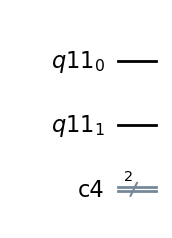

In [54]:
%matplotlib inline
ckt.draw(output='mpl')
#ckt.draw(output='mpl',initial_state=True)

In [55]:
ckt.h(qr[0])
ckt.cx(qr[0],qr[1])

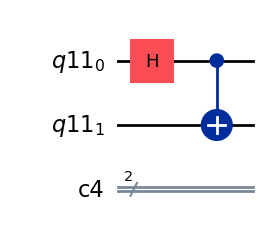

In [56]:
ckt.draw(output='mpl')

In [57]:
ckt.measure(qr,cr)

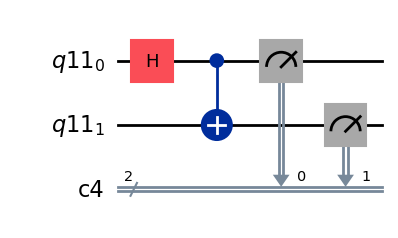

In [58]:
ckt.draw(output='mpl')

In [59]:
backend = AerSimulator()

       ┌───┐     ┌─┐   
q11_0: ┤ H ├──■──┤M├───
       └───┘┌─┴─┐└╥┘┌─┐
q11_1: ─────┤ X ├─╫─┤M├
            └───┘ ║ └╥┘
 c4: 2/═══════════╩══╩═
                  0  1 
{'11': 494, '00': 506}


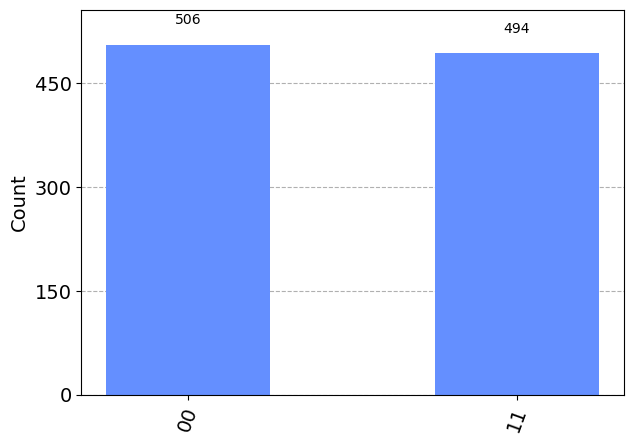

In [60]:
    print(ckt)
    
    #chosing backend and executing job
    backend = AerSimulator()
    
    # First we have to transpile the quantum circuit 
    # to the low-level QASM instructions used by the 
    # backend
    qc_compiled = transpile(ckt, backend)
    
    # Execute the circuit on the qasm simulator.
    # We've set the number of repeats of the circuit
    # to be 1024, which is the default.
    job_sim = backend.run(qc_compiled, shots=1000)
    
    # Grab the results from the job.
    result_sim = job_sim.result()
    
    counts = result_sim.get_counts(qc_compiled)
    print(counts)
    plot_histogram(counts)
    

In [61]:
#IBMQ.save_account('c7b2acd23445b5c5f7f91bf9d5fe497721d3e9129aade2ee8ff6d21319cc0094a931df1200a0a854efb4fdbee70225778f01bb966697eb757c9860571966e6f1', overwrite=True)
IBMQ.load_account()

NameError: name 'IBMQ' is not defined

In [ ]:
provider=IBMQ.get_provider('ibm-q')


In [ ]:
avl_backends = provider.backends()
print(avl_backends)



In [ ]:
num_qubits = 2

from qiskit.providers.ibmq import least_busy
possible_devices = provider.backends(filters=lambda x: 
                                     x.configuration().n_qubits >= num_qubits
                                       and 
                                     x.configuration().simulator == False)
qcomp = least_busy(possible_devices)
print(qcomp)


In [ ]:
#qcomp=provider.get_backend('ibmq_santiago')

In [ ]:
job=execute(ckt,backend=qcomp)

In [ ]:
from qiskit.tools.monitor import job_monitor

In [ ]:
job_monitor(job)

In [ ]:
result=job.result()

In [ ]:
plot_histogram(result.get_counts(ckt))